In [6]:
import numpy as np
import joblib
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, GRU, Bidirectional, Dense
import matplotlib.pyplot as plt

In [2]:
# Load processed sequences
sequences = np.load("../data/processed/tokenized_sequences.npy")
tokenizer = joblib.load('../models/tokenizer.pkl')

In [3]:
# Split into train and target
X_train, y_train = sequences[:, :-1], sequences[:, -1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(tokenizer.word_index) + 1)

In [4]:
# Build GRU model
D = 512
V = len(tokenizer.word_index) + 1
T = X_train.shape[1]

i = Input(shape=(T,))
x = Embedding(V, D)(i)

x = Bidirectional(GRU(200))(x)
x = Dense(V, activation="softmax")(x)
gru_model = Model(i, x)

# Compile the model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
gru_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
189/189 [==============================] - 152s 788ms/step - loss: 7.8600 - accuracy: 0.0818
Epoch 2/50
189/189 [==============================] - 147s 777ms/step - loss: 5.8708 - accuracy: 0.1115
Epoch 3/50
189/189 [==============================] - 146s 773ms/step - loss: 5.0553 - accuracy: 0.1631
Epoch 4/50
189/189 [==============================] - 146s 774ms/step - loss: 4.0896 - accuracy: 0.2655
Epoch 5/50
189/189 [==============================] - 148s 781ms/step - loss: 3.0742 - accuracy: 0.3889
Epoch 6/50
189/189 [==============================] - 150s 796ms/step - loss: 2.1043 - accuracy: 0.5678
Epoch 7/50
189/189 [==============================] - 152s 805ms/step - loss: 1.2684 - accuracy: 0.7677
Epoch 8/50
189/189 [==============================] - 152s 807ms/step - loss: 0.6955 - accuracy: 0.8887
Epoch 9/50
189/189 [==============================] - 154s 812ms/step - loss: 0.3794 - accuracy: 0.9484
Epoch 10/50
189/189 [==============================] - 153s 808m

In [5]:
# Save the trained GRU model
#gru_model.save('../models/gru_text_generation_model.keras')

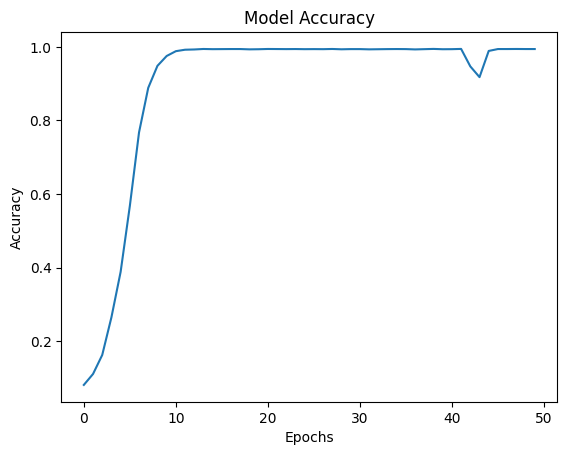

In [8]:
plt.plot(gru_model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('../plots/gru_model_training.png')
plt.show()